In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time	

In [0]:
class Gait():
    def __init__(self, max_leg_displacement):
        self.max_leg_displacement = max_leg_displacement
        self.leg_clocks = [0, 0, 0,0]
        self.stance_phase_signals = [0,0,0,0]
        self.swing_phase_signals = [0,0,0,0]
        self.last_touchdown = 0
        self.phase_gen_started = False

    def now(self):
        return int(round(time.time() * 1000))

    def generate(self, target_velocity_x):
        now = self.now()
        elapsed_time_ref = 0
        swing_phase_period = 250  
        stance_phase_period = (self.max_leg_displacement / target_velocity_x) * 1000
        stride_phase_period = swing_phase_period + stance_phase_period

        leg_clocks = [0, 0, 0, 0]
        swing_phase_signals = [0, 0, 0, 0]
        stance_phase_signals = [0, 0, 0, 0]

        if not self.phase_gen_started:
            self.phase_gen_started = True
            self.last_touchdown = now
            
        if now - self.last_touchdown >= stride_phase_period:
            self.last_touchdown = now
            
        if elapsed_time_ref > stride_phase_period:
            elapsed_time_ref = stride_phase_period
        else:
            elapsed_time_ref = now - self.last_touchdown
            
        leg_clocks[0] = elapsed_time_ref - (0.0 * stride_phase_period)
        leg_clocks[1] = elapsed_time_ref - (0.5 * stride_phase_period)
        leg_clocks[2] = elapsed_time_ref - (0.5 * stride_phase_period)
        leg_clocks[3] = elapsed_time_ref - (0.0 * stride_phase_period)

        for i in range(4):
        
            if leg_clocks[i] > 0 and leg_clocks[i] < stance_phase_period:
                stance_phase_signals[i] = leg_clocks[i] / stance_phase_period
            else:
                stance_phase_signals[i] = 0

            if leg_clocks[i] > -swing_phase_period and leg_clocks[i] < 0:
                swing_phase_signals[i] = (leg_clocks[i]  + swing_phase_period) / swing_phase_period
                
            elif leg_clocks[i] > stance_phase_period and leg_clocks[i] < stride_phase_period:
                swing_phase_signals[i] = (leg_clocks[i]  - stance_phase_period) / swing_phase_period 

            else:
                swing_phase_signals[i] = 0

        return stance_phase_signals, swing_phase_signals, now 

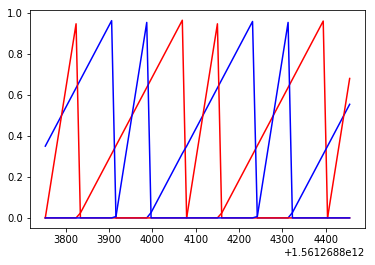

In [6]:
FREQ = 100
MAX_DISPLACEMENT = 0.15
VEL = 2.0
g = Gait(MAX_DISPLACEMENT)
has_started = False
time_started = 0
l_swing_signals = []
r_swing_signals = []
l_stance_signals = []
r_stance_signals = []
collected_time = []

while True:
    if not has_started:
        has_started = True
        time_started = g.now()

    stance_signals = []
    swing_signals = []
    current_time = 0

    stance_signals, swing_signals, current_time = g.generate(VEL)
    
    l_stance_signals.append(stance_signals[0])
    l_swing_signals.append(swing_signals[0])

    r_stance_signals.append(stance_signals[1])
    r_swing_signals.append(swing_signals[1])

    collected_time.append(current_time)

    if g.now() - time_started > 700:
        plt.plot(collected_time, l_swing_signals, 'r')
        plt.plot(collected_time, r_swing_signals, 'b')
        plt.plot(collected_time, l_stance_signals, 'r')
        plt.plot(collected_time, r_stance_signals, 'b')
        plt.show()
        break

    time.sleep(1 / FREQ)